<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-definitions" data-toc-modified-id="Imports-and-definitions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and definitions</a></span></li><li><span><a href="#Load-tables" data-toc-modified-id="Load-tables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load tables</a></span></li><li><span><a href="#Word-frequency-analysis" data-toc-modified-id="Word-frequency-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Word frequency analysis</a></span><ul class="toc-item"><li><span><a href="#High-frequency-words" data-toc-modified-id="High-frequency-words-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>High frequency words</a></span></li><li><span><a href="#Wordclouds" data-toc-modified-id="Wordclouds-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Wordclouds</a></span></li><li><span><a href="#TF-IDF-analysis" data-toc-modified-id="TF-IDF-analysis-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>TF-IDF analysis</a></span></li></ul></li></ul></div>

# Analysis 2 - Word frequency

## Imports and definitions

In [1]:
%load_ext memory_profiler
from collections import Counter
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') #Generally nice
from pandasql import sqldf
sql = lambda x: sqldf(x, globals())
#Just for fun...
from wordcloud import WordCloud

## Load tables

In [2]:
%%time
path = 'output_data/'
tweet = pd.read_parquet(path+'cleantweets.parquet')
user = pd.read_csv(path+'user.csv')
hashtag = pd.read_csv(path+'hashtag.csv')
mention = pd.read_csv(path+'mention.csv')
tweet_hashtag = pd.read_csv(path+'tweet_hashtag.csv')
tweet_mention = pd.read_csv(path+'tweet_mention.csv')

CPU times: user 3.76 s, sys: 1.26 s, total: 5.02 s
Wall time: 4.14 s


In [3]:
#Just to speed up processing during development
#tweet = tweet.iloc[:int(len(tweet)/20)]

## Word frequency analysis

### High frequency words

In [4]:
%%time
corpus = []
for i in range(len(tweet)):
        corpus += list(tweet['words'].iloc[i])
word_dict = Counter(corpus)

CPU times: user 9.87 s, sys: 65.5 ms, total: 9.94 s
Wall time: 9.95 s


In [5]:
topwords = [(k, v) for k, v in sorted(word_dict.items(), key = lambda x:x[1], reverse=True)]

In [6]:
topwords = pd.DataFrame(topwords,columns=['word','frequency'])
topwords.to_csv(path+'topwords.csv',index=None)

### Wordclouds

In [7]:
%%time
t = tweet[['created_at','wordtext']]
t_2008 = sql('SELECT wordtext FROM t WHERE strftime("%Y", created_at) = 2008')
t_2009 = sql('SELECT wordtext FROM t WHERE strftime("%Y", created_at) = 2009')
t_2010 = sql('SELECT wordtext FROM t WHERE strftime("%Y", created_at) = 2010')
t_2011 = sql('SELECT wordtext FROM t WHERE strftime("%Y", created_at) = 2011')
t_2012 = sql('SELECT wordtext FROM t WHERE strftime("%Y", created_at) = 2012')
t_2013 = sql('SELECT wordtext FROM t WHERE strftime("%Y", created_at) = 2013')
t_2014 = sql('SELECT wordtext FROM t WHERE strftime("%Y", created_at) = 2014')
t_2015 = sql('SELECT wordtext FROM t WHERE strftime("%Y", created_at) = 2015')
t_2016 = sql('SELECT wordtext FROM t WHERE strftime("%Y", created_at) = 2016')
t_2017 = sql('SELECT wordtext FROM t WHERE strftime("%Y", created_at) = 2017')

CPU times: user 1min 4s, sys: 2.28 s, total: 1min 6s
Wall time: 1min 6s


In [8]:
def display_cloud(df_in):
    df = df_in.copy()
    corpus = []
    for i in range(len(tweet)):
        corpus += list(tweet['words'].iloc[i])
    word_dict = Counter(corpus)
    word_cloud = WordCloud().generate_from_frequencies(word_dict)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.show()

Tweets from 2008


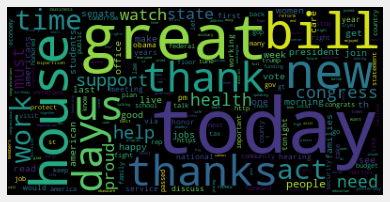

Tweets from 2009


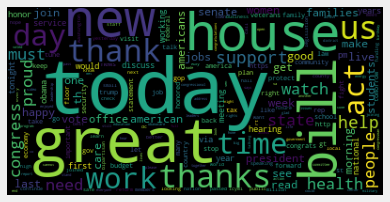

Tweets from 2010


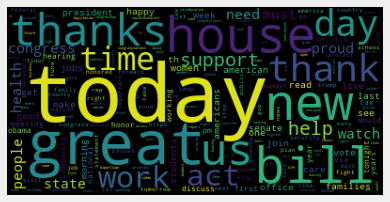

Tweets from 2011


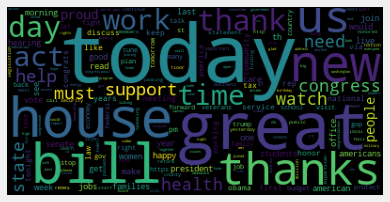

Tweets from 2012


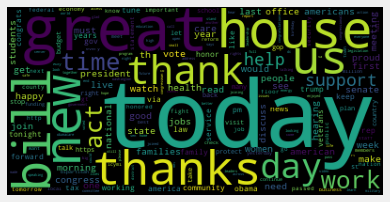

Tweets from 2013


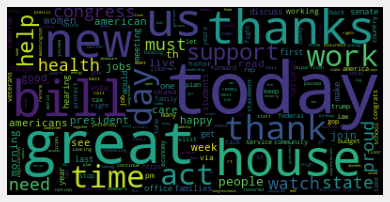

Tweets from 2014


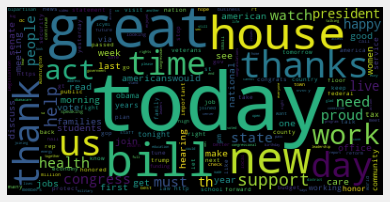

Tweets from 2015


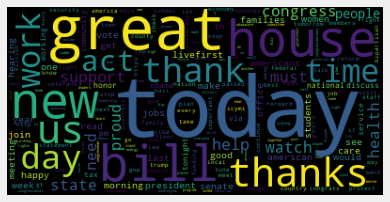

Tweets from 2016


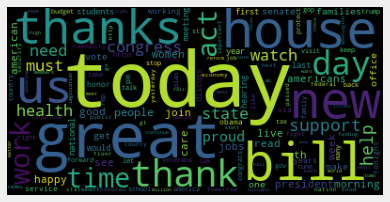

Tweets from 2017


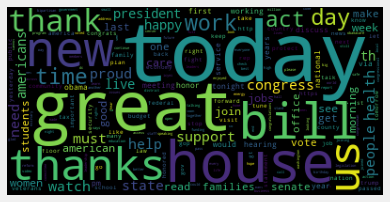

CPU times: user 1min 32s, sys: 85 ms, total: 1min 32s
Wall time: 1min 32s


In [9]:
%%time
for year in range(2008, 2018):
    df_name = 't_'+str(year)
    print('Tweets from',year)
    display_cloud(eval(df_name))

### TF-IDF analysis

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
%%memit
#Transform document into a count array
vec = CountVectorizer(max_features=500, max_df=0.08)
v = vec.fit_transform(tweet.text)

peak memory: 1477.08 MiB, increment: 177.63 MiB


In [12]:
vec.get_feature_names()

['about',
 'access',
 'across',
 'act',
 'action',
 'address',
 'admin',
 'administration',
 'affordable',
 'after',
 'afternoon',
 'ag',
 'again',
 'against',
 'ago',
 'agree',
 'air',
 'all',
 'also',
 'always',
 'am',
 'amendment',
 'america',
 'american',
 'americans',
 'anniversary',
 'annual',
 'another',
 'are',
 'around',
 'attack',
 'award',
 'away',
 'back',
 'because',
 'been',
 'before',
 'being',
 'believe',
 'benefits',
 'best',
 'better',
 'big',
 'bill',
 'billion',
 'bills',
 'bipartisan',
 'birthday',
 'bring',
 'budget',
 'business',
 'businesses',
 'but',
 'by',
 'call',
 'calling',
 'can',
 'cannot',
 'capitol',
 'care',
 'celebrate',
 'celebrating',
 'center',
 'ceremony',
 'chairman',
 'change',
 'check',
 'children',
 'city',
 'class',
 'clean',
 'climate',
 'co',
 'colleagues',
 'college',
 'come',
 'coming',
 'committee',
 'communities',
 'community',
 'conference',
 'congrats',
 'congratulations',
 'congress',
 'congressional',
 'congressman',
 'constituents'

In [13]:
t = TfidfTransformer()
x = t.fit_transform(v)

In [14]:
tf_idf = pd.DataFrame(x.toarray(),columns=vec.get_feature_names())
tf_idf

,about,access,across,act,action,address,admin,administration,affordable,after,...,workers,working,world,would,year,years,yesterday,young,your,yrs
0,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226944,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1226945,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1226946,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1226947,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [15]:
%%time
avs = tf_idf.sum()

CPU times: user 2.47 s, sys: 4.77 s, total: 7.24 s
Wall time: 9.16 s


In [16]:
top50 = avs.sort_values(ascending=False).head(50)
top50 = pd.DataFrame(top50).reset_index()
top50.columns = ['word','importance']
top50 = top50.sort_values(by='importance', ascending=True)

<BarContainer object of 50 artists>

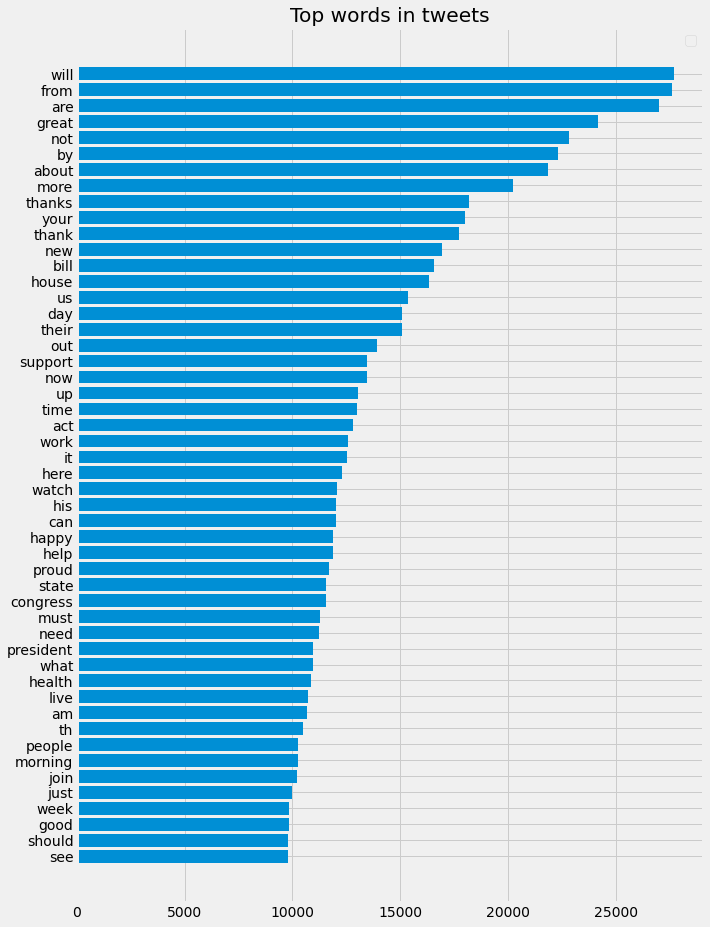

In [17]:
plt.figure(figsize=(10,15))
plt.title('Top words in tweets')
plt.legend('')
plt.xlabel('')
plt.ylabel('')
plt.barh(top50['word'], top50['importance'])

In [18]:
top50.sort_values(by='importance', ascending=False)

,word,importance
0,will,27681.29
1,from,27614.83
2,are,26996.49
3,great,24165.57
4,not,22810.20
5,by,22322.20
6,about,21847.67
7,more,20241.09
8,thanks,18196.32
9,your,17984.62
